In [4]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn. metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\Siva\OneDrive\Desktop\proj1\diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [10]:
df.duplicated

<bound method DataFrame.duplicated of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.6

In [11]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [12]:
df.shape

(768, 9)

In [13]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [14]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [15]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [18]:
df.value_counts('DiabetesPedigreeFunction')

DiabetesPedigreeFunction
0.258    6
0.254    6
0.207    5
0.238    5
0.268    5
        ..
1.441    1
1.461    1
1.222    1
1.251    1
1.258    1
Name: count, Length: 517, dtype: int64

In [19]:
grouped = df.groupby("Outcome").mean()

grouped.index = ["Non-Diabetic", "Diabetic"]

print(grouped)

              Pregnancies     Glucose  BloodPressure  SkinThickness  \
Non-Diabetic     3.298000  109.980000      68.184000      19.664000   
Diabetic         4.865672  141.257463      70.824627      22.164179   

                 Insulin        BMI  DiabetesPedigreeFunction        Age  
Non-Diabetic   68.792000  30.304200                  0.429734  31.190000  
Diabetic      100.335821  35.142537                  0.550500  37.067164  


In [21]:
X=df.drop(columns = 'Outcome', axis=1)

Y=df ['Outcome']

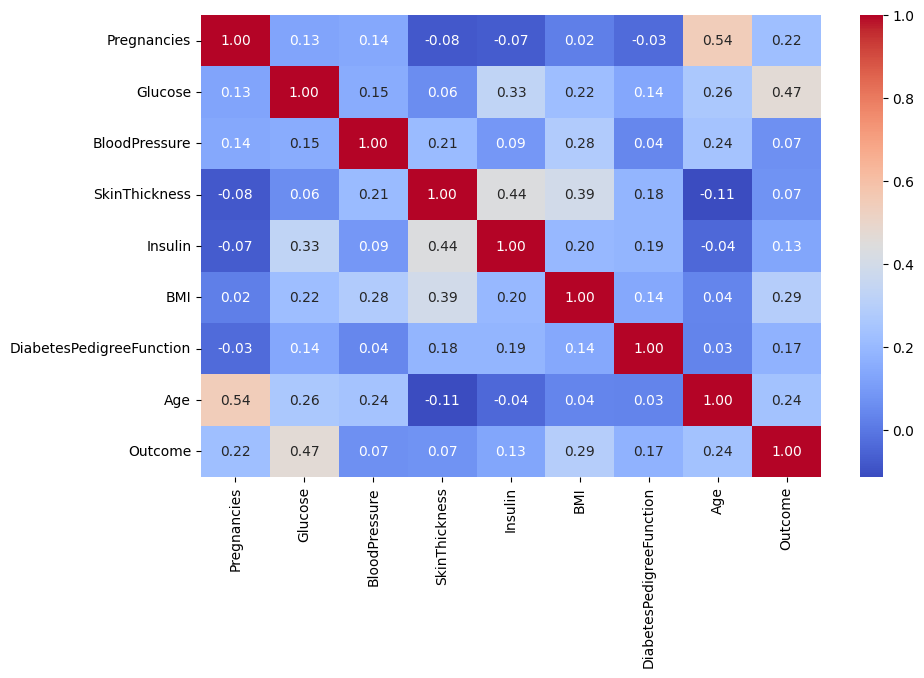

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



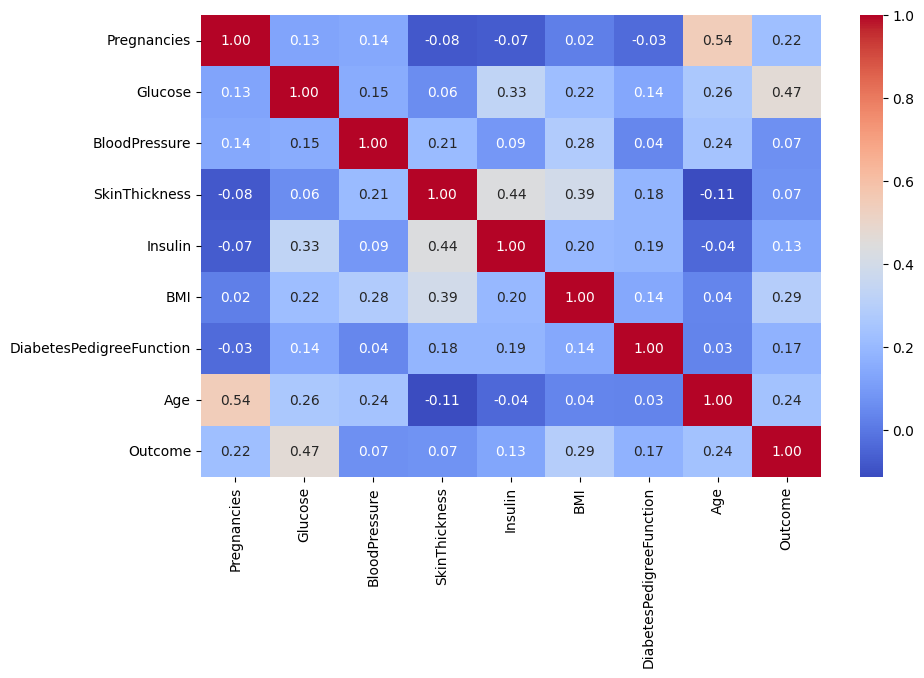

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [11]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
classifier =svm.SVC(kernel='linear')

In [13]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)



In [15]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report

In [16]:
X_train_prediction = classifier.predict(X_train)
test_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [13]:
print('accuracy score of the test data :',test_data_accuracy)

accuracy score of the test data : 0.7736156351791531


In [14]:
2+1

3

In [1]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report

Text(0.5, 1.0, 'Confusion Matrix- svm Classifier ')

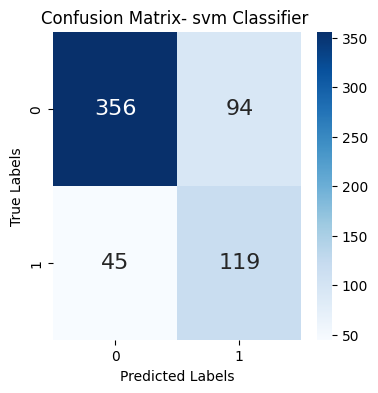

In [17]:
cm_train=confusion_matrix(X_train_prediction, y_train)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')

In [21]:
X_train_prediction = classifier.predict(X_train)
test_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [24]:
print('accuracy score of the test data :',test_data_accuracy)

accuracy score of the test data : 0.7736156351791531


In [25]:
import pickle

In [26]:
filename = 'diabetes_model.sav'
pickle.dump(classifier,open(filename,'wb'))